<h4>7. Train and fine-tune a Decision Tree for the moons dataset.</h4>

In [10]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

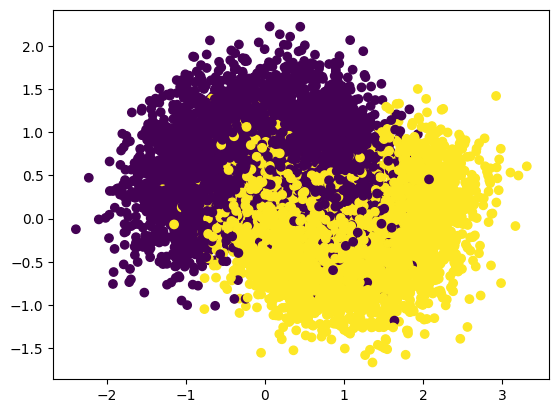

In [20]:
dataset = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2)

In [22]:
len(X_train)

8000

In [23]:
grid_search = GridSearchCV(DecisionTreeClassifier(), {'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500, 1000]}, cv=3, verbose=2)
grid_search.fit(X_train[:4000], y_train[:4000])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ...................................max_leaf_nodes=3; total time=   0.0s
[CV] END ...................................max_leaf_nodes=3; total time=   0.0s
[CV] END ...................................max_leaf_nodes=3; total time=   0.0s
[CV] END ...................................max_leaf_nodes=5; total time=   0.0s
[CV] END ...................................max_leaf_nodes=5; total time=   0.0s
[CV] END ...................................max_leaf_nodes=5; total time=   0.0s
[CV] END ..................................max_leaf_nodes=10; total time=   0.0s
[CV] END ..................................max_leaf_nodes=10; total time=   0.0s
[CV] END ..................................max_leaf_nodes=10; total time=   0.0s
[CV] END ..................................max_leaf_nodes=20; total time=   0.0s
[CV] END ..................................max_leaf_nodes=20; total time=   0.0s
[CV] END ..................................max_le

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500,
                                            1000]},
             verbose=2)

In [24]:
grid_search.best_estimator_, grid_search.best_score_  

(DecisionTreeClassifier(max_leaf_nodes=10), 0.8545029810676058)

Accuracy is 0.854 with max_leaf_nodes=6. Now we train on the full training set and measure the accuracy on the test set.

In [25]:
grid_search.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [26]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.8435

Accuracy is 0.8435.

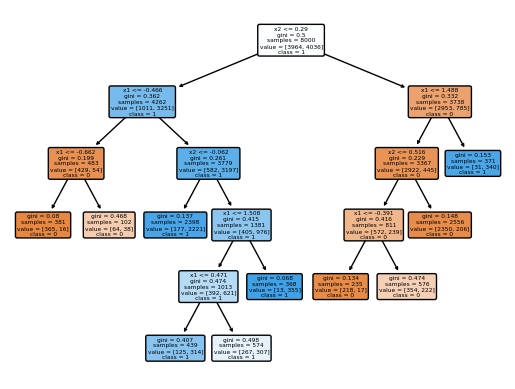

In [40]:
from sklearn.tree import export_graphviz, plot_tree

export_graphviz(grid_search.best_estimator_, out_file='tree.dot', feature_names=['x1', 'x2'], class_names=['0', '1'], rounded=True, filled=True)
plot_tree(grid_search.best_estimator_, feature_names=['x1', 'x2'], class_names=['0', '1'], rounded=True, filled=True);

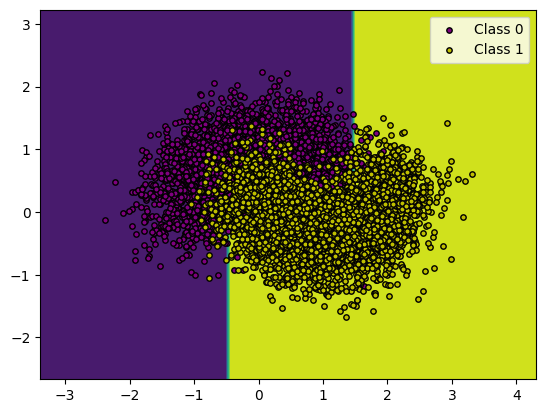

In [56]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator( 
        grid_search.best_estimator_,
        X_train,
        response_method="predict")
class_0 = X_train[y_train==0]
class_1 = X_train[y_train==1]
names = ['Class 0', 'Class 1']
plt.scatter(class_0[:,0], class_0[:,1], c='purple', edgecolors='black', s=15, label=names[0])
plt.scatter(class_1[:,0], class_1[:,1], c='y', edgecolors='black', s=15, label=names[1])
plt.legend()

<h4>8. Grow a forest.</h4>

In [58]:
from sklearn.model_selection import ShuffleSplit   
subsets = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)   
subsets.get_n_splits(X_train)  

1000